# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy


  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=e03f58bdede61524b63d506f331a33cb0a6502e70b6d7a2e8db03af31ba2c8ed
  Stored in directory: c:\users\popes\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy



In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
cities


['balkanabat',
 'luderitz',
 'hermanus',
 'narkanda',
 'katsuura',
 'illoqqortoormiut',
 'saskylakh',
 'fairlie',
 'havre-saint-pierre',
 'bethel',
 'castro',
 'ushuaia',
 'avarua',
 'tongchuan',
 'cape town',
 'kahului',
 'mahebourg',
 'vao',
 'zhigansk',
 'saint-philippe',
 'rio grande',
 'nanortalik',
 'yar-sale',
 'busselton',
 'arraial do cabo',
 'ewa beach',
 'muli',
 'port elizabeth',
 'iralaya',
 'ilulissat',
 'punta arenas',
 'husavik',
 'constitucion',
 'laguna',
 'pochutla',
 'kodiak',
 'vaini',
 'fare',
 'lorengau',
 'victoria',
 'bail hongal',
 'hilo',
 'kruisfontein',
 'rikitea',
 'pacific grove',
 'broken hill',
 'kavieng',
 'jalu',
 'makat',
 'atuona',
 'buariki',
 'qaanaaq',
 'bluff',
 'kavaratti',
 'faanui',
 'taolanaro',
 'sao filipe',
 'makakilo city',
 'new norfolk',
 'mackay',
 'alice springs',
 'chuy',
 'isangel',
 'comodoro rivadavia',
 'barentsburg',
 'butaritari',
 'albany',
 'gorontalo',
 'shumskiy',
 'belyy yar',
 'aklavik',
 'hasaki',
 'sao felix do xingu',

In [87]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temp = []
lat = []
humid = []
cloudy = []
windy = []
cities2 = []
lon = []
country = []
print(f'Beginning Data Retrieval')
print('-----------------------------')
counter = 0
counter2 = 1
for city in cities:
    counter = counter + 1
    try:
        
        query_url = url + "appid=" + weather_api_key + '&units=metric' + "&q=" + city
        weather_response = requests.get(query_url).json() 
    #weather_json = weather_response.json()
        temp.append(weather_response['main']['temp_max'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        cloudy.append(weather_response['clouds']['all'])
        windy.append(weather_response['wind']['speed'])
        humid.append(weather_response['main']['humidity'])
        cities2.append(city)
        country.append(weather_response["sys"]["country"])
        print(f'Processing Record {counter} of Set {counter2} | {city}')
    except:
        print('City not found. Skipping...')
        
        
        
    if counter == 50:
              counter = 0
              counter2 = counter2 + 1
   
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | general pico
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | komarichi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | sakakah
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | chifeng
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | guangshui
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | dikson
City not found. Skipping...
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | hilo
Processing 

Processing Record 7 of Set 5 | agadez
Processing Record 8 of Set 5 | la gomera
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | bled
Processing Record 11 of Set 5 | castro
Processing Record 12 of Set 5 | vila do maio
Processing Record 13 of Set 5 | monte patria
Processing Record 14 of Set 5 | maroantsetra
Processing Record 15 of Set 5 | galesong
Processing Record 16 of Set 5 | yar-sale
Processing Record 17 of Set 5 | tigil
Processing Record 18 of Set 5 | padron
Processing Record 19 of Set 5 | severo-kurilsk
Processing Record 20 of Set 5 | brownfield
Processing Record 21 of Set 5 | kidal
City not found. Skipping...
Processing Record 23 of Set 5 | port blair
Processing Record 24 of Set 5 | bubaque
Processing Record 25 of Set 5 | saint-francois
Processing Record 26 of Set 5 | dickinson
Processing Record 27 of Set 5 | katsuura
Processing Record 28 of Set 5 | berestechko
Processing Record 29 of Set 5 | paita
Processing Record 30 of Set 5 | deputatskiy
Processing Recor

Processing Record 11 of Set 9 | dolovo
Processing Record 12 of Set 9 | mehamn
Processing Record 13 of Set 9 | tsiroanomandidy
Processing Record 14 of Set 9 | te anau
Processing Record 15 of Set 9 | clyde river
Processing Record 16 of Set 9 | muncar
Processing Record 17 of Set 9 | isetskoye
Processing Record 18 of Set 9 | rocha
Processing Record 19 of Set 9 | belaya gora
Processing Record 20 of Set 9 | muli
Processing Record 21 of Set 9 | tromso
Processing Record 22 of Set 9 | belmonte
Processing Record 23 of Set 9 | mana
Processing Record 24 of Set 9 | aykhal
Processing Record 25 of Set 9 | srednekolymsk
Processing Record 26 of Set 9 | panzhihua
Processing Record 27 of Set 9 | juruti
Processing Record 28 of Set 9 | villa de reyes
Processing Record 29 of Set 9 | hudiksvall
City not found. Skipping...
Processing Record 31 of Set 9 | aberdeen
Processing Record 32 of Set 9 | yakeshi
Processing Record 33 of Set 9 | sanmenxia
Processing Record 34 of Set 9 | port hardy
Processing Record 35 of

Processing Record 13 of Set 13 | zhangye
Processing Record 14 of Set 13 | matamoros
Processing Record 15 of Set 13 | yuli
Processing Record 16 of Set 13 | san miguel
Processing Record 17 of Set 13 | albert lea
Processing Record 18 of Set 13 | lagos
City not found. Skipping...
Processing Record 20 of Set 13 | mildura
Processing Record 21 of Set 13 | dunedin
Processing Record 22 of Set 13 | ancud
Processing Record 23 of Set 13 | praia
Processing Record 24 of Set 13 | havre-saint-pierre
City not found. Skipping...
Processing Record 26 of Set 13 | pacific grove
Processing Record 27 of Set 13 | heinola
Processing Record 28 of Set 13 | half moon bay
Processing Record 29 of Set 13 | nome
Processing Record 30 of Set 13 | ixtapa
Processing Record 31 of Set 13 | bosaso
Processing Record 32 of Set 13 | oksfjord
Processing Record 33 of Set 13 | dolores hidalgo
Processing Record 34 of Set 13 | mogadishu
Processing Record 35 of Set 13 | nenjiang
Processing Record 36 of Set 13 | kawalu
Processing Rec

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
cities_df = pd.DataFrame()
cities_df['City'] = cities2
cities_df['Temperature_max'] = temp
cities_df['Wind'] = windy
cities_df['Humidity'] = humid
cities_df['Latitude'] = lat
cities_df['Longitude'] = lon
cities_df['Cloudiness'] = cloudy
cities_df['Country'] = country
cities_df.to_csv("../output_data/cities.csv")
cities_df.head()

,City,Temperature_max,Wind,Humidity,Latitude,Longitude,Cloudiness,Country
0,bambous virieux,25.00,3.60,94,-20.3428,57.7575,75,MU
1,butaritari,28.16,4.78,76,3.0707,172.7902,82,KI
2,general pico,12.65,3.48,77,-35.6566,-63.7568,0,AR
3,champerico,28.00,3.09,78,14.3000,-91.9167,75,GT
4,komarichi,-1.40,3.23,82,52.4151,34.7905,94,RU


In [89]:
cities_df.describe()

,Temperature_max,Wind,Humidity,Latitude,Longitude,Cloudiness
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,15.531664,3.343243,70.707980,20.984121,14.914490,54.258065
std,10.576758,2.362045,21.785666,33.122581,88.742109,40.418238
min,-12.580000,0.200000,1.000000,-54.800000,-179.166700,0.000000
25%,6.670000,1.540000,60.000000,-5.350000,-62.996700,7.000000
50%,16.670000,2.680000,75.000000,25.774300,19.416800,69.000000
75%,25.000000,4.630000,88.000000,49.783300,90.500000,97.000000
max,33.000000,14.920000,100.000000,78.218600,178.416700,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [96]:
len(cities2)
len(cities2_df)

571

In [92]:
cities2_df = cities_df.loc[cities_df['Humidity'] < 100]
cities2_df


,City,Temperature_max,Wind,Humidity,Latitude,Longitude,Cloudiness,Country
0,bambous virieux,25.00,3.60,94,-20.3428,57.7575,75,MU
1,butaritari,28.16,4.78,76,3.0707,172.7902,82,KI
2,general pico,12.65,3.48,77,-35.6566,-63.7568,0,AR
3,champerico,28.00,3.09,78,14.3000,-91.9167,75,GT
4,komarichi,-1.40,3.23,82,52.4151,34.7905,94,RU
...,...,...,...,...,...,...,...,...
584,kamina,18.70,1.25,92,-8.7386,24.9906,100,CD
585,macas,19.64,0.97,98,-2.3167,-78.1167,100,EC
586,kokkola,0.56,1.03,93,63.8385,23.1307,0,FI
587,karaman,7.16,4.77,78,37.0833,33.2500,47,TR


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [98]:
#  Get the indices of cities that have humidity over 100%.


TypeError: list indices must be integers or slices, not str

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

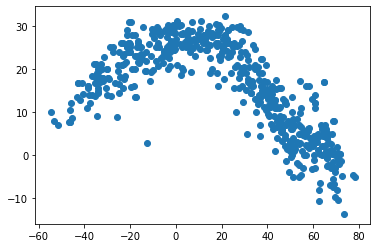

In [51]:
plt.scatter(lat,temp)
plt.show()

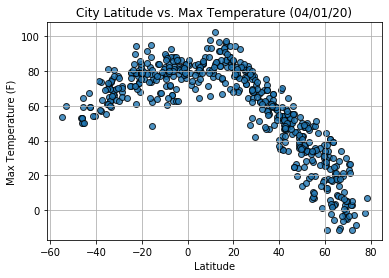

## Latitude vs. Humidity Plot

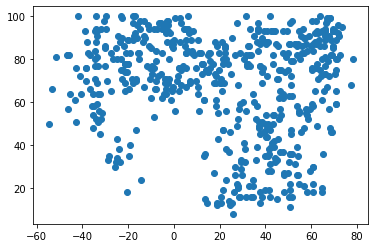

In [52]:
plt.scatter(lat,humid)
plt.show()

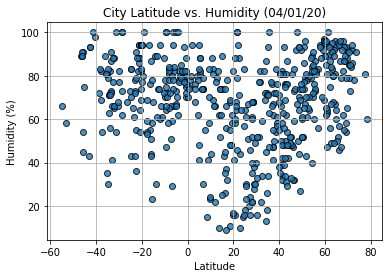

## Latitude vs. Cloudiness Plot

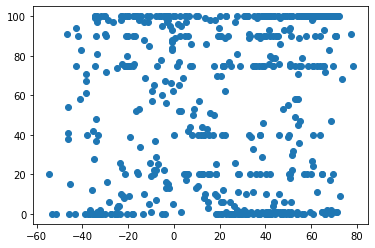

In [53]:
plt.scatter(lat,cloudy)
plt.show()

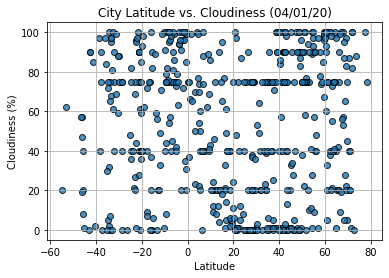

## Latitude vs. Wind Speed Plot

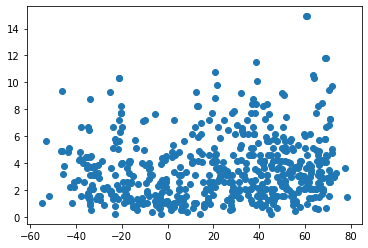

In [54]:
plt.scatter(lat,windy)
plt.show()

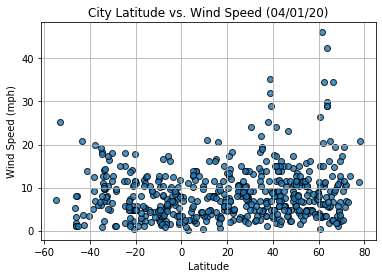

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
cities3_df = cities_df.loc[cities_df['Latitude'] > 0]
cities3_df

,City,Temperature_max,Wind,Humidity,Latitude,Cloudiness
0,balkanabat,20.85,2.16,46,39.5108,75
3,narkanda,4.89,2.56,38,31.2548,0
4,katsuura,20.56,6.17,60,35.1333,75
5,saskylakh,0.21,4.78,96,71.9167,100
6,fairlie,5.56,0.45,83,55.7560,79
...,...,...,...,...,...,...
562,acapetahua,28.00,2.57,83,15.2833,40
563,kuvshinovo,0.10,5.34,83,57.0295,100
564,axim,26.33,2.58,86,4.8699,100
565,kisangani,21.02,0.86,99,0.5167,100


The r-value is: -0.8889631491662535


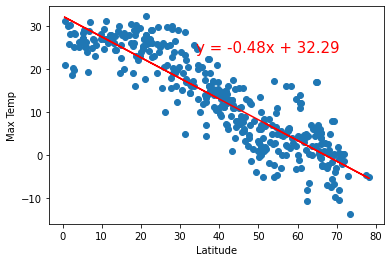

In [64]:
north_lat = cities3_df['Latitude']
north_temp = cities3_df['Temperature_max']
correlation = st.pearsonr(north_lat,north_temp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_temp)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue}')

The r-value is: 0.46937863826630627


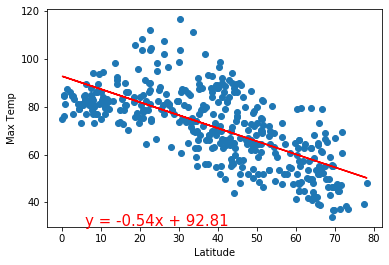

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2062200276348953


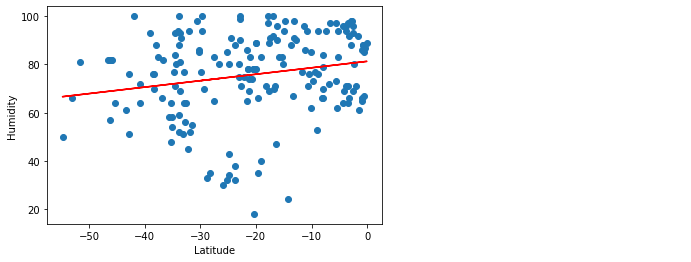

In [72]:
cities4_df = cities_df.loc[cities_df['Latitude'] < 0]
cities4_df
south_lat = cities4_df['Latitude']
south_humid = cities4_df['Humidity']
correlation = st.pearsonr(south_lat,south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_humid)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')

The r-value is: 0.6082708688906918


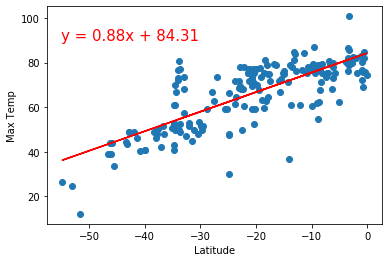

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06648816343413864


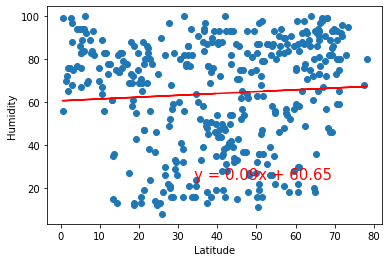

In [66]:
north_lat = cities3_df['Latitude']
north_humid = cities3_df['Humidity']
correlation = st.pearsonr(north_lat,north_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_humid)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')

The r-value is: 0.000543987878808455


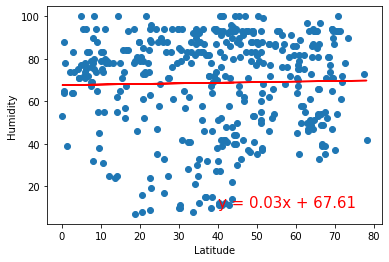

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2062200276348953


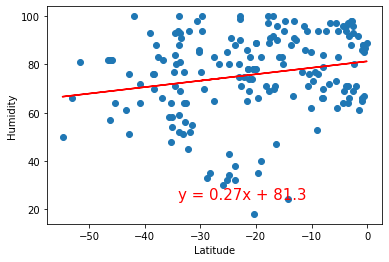

In [79]:
south_lat = cities4_df['Latitude']
south_humid = cities4_df['Humidity']
correlation = st.pearsonr(south_lat,south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_humid)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')

The r-value is: 0.014985174297345524


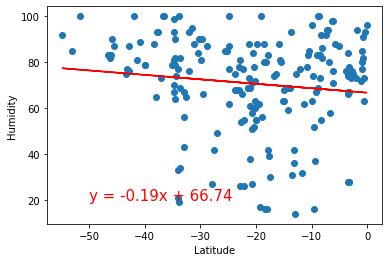

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18734338744059262


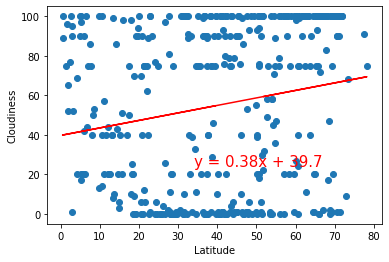

In [67]:
north_lat = cities3_df['Latitude']
north_cloud = cities3_df['Cloudiness']
correlation = st.pearsonr(north_lat,north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_cloud)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue}')

The r-value is: 0.0020898727664228514


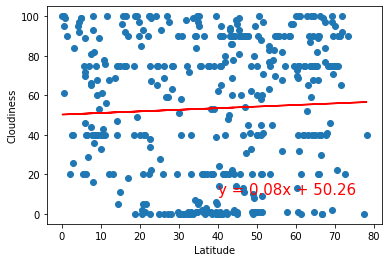

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25032029587034554


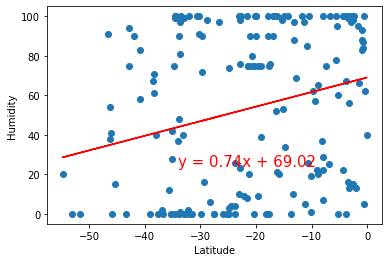

In [78]:
south_lat = cities4_df['Latitude']
south_cloud = cities4_df['Cloudiness']
correlation = st.pearsonr(south_lat,south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_cloud)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-34,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue}')

The r-value is: 0.0035263772085582894


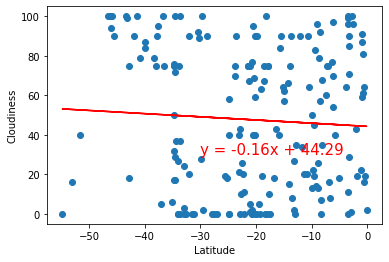

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11601283061035926


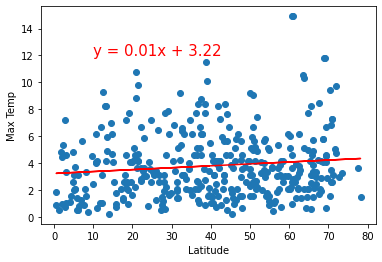

In [71]:
north_lat = cities3_df['Latitude']
north_wind = cities3_df['Wind']
correlation = st.pearsonr(north_lat,north_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_wind)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
print(f'The r-value is: {rvalue}')

The r-value is: 0.04019723576144484


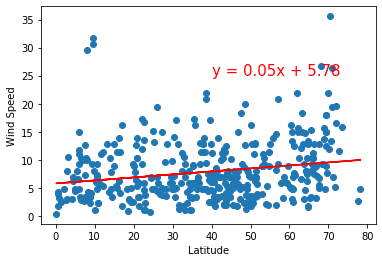

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2212041890533036


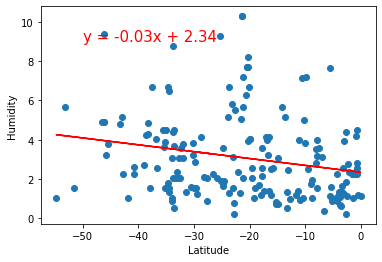

In [77]:
south_lat = cities4_df['Latitude']
south_wind = cities4_df['Wind']
correlation = st.pearsonr(south_lat,south_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_wind)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
print(f'The r-value is: {rvalue}')

The r-value is: 0.017128274759839232


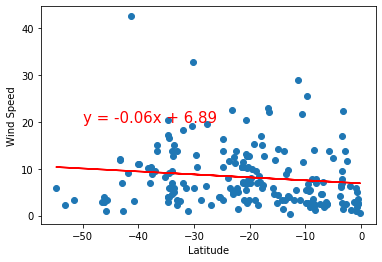